In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [56]:
np.set_printoptions(precision = 4, linewidth=100)

In [57]:
MBA_df = pd.read_csv('MBA_Salary.csv', index_col=[0])
MBA_df.columns

Index(['Percentage in Grade 10', 'Salary'], dtype='object')

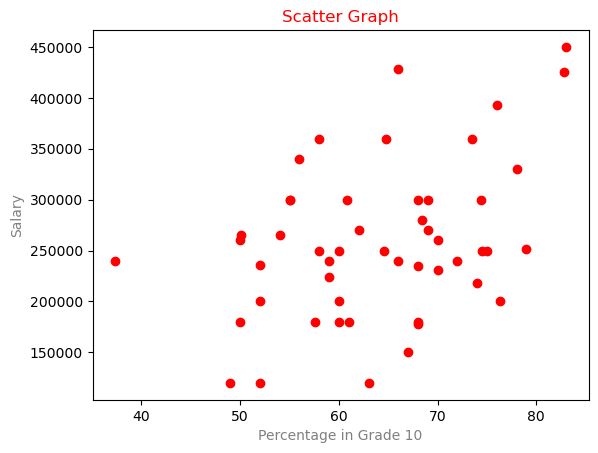

In [58]:
plt.title('Scatter Graph', color = 'red')
plt.xlabel('Percentage in Grade 10', color = 'gray')
plt.ylabel('Salary', color = 'gray')
plt.scatter(x=MBA_df['Percentage in Grade 10'],y=MBA_df['Salary'], color ='red')
plt.show()

In [59]:
X = sm.add_constant(MBA_df['Percentage in Grade 10'])
Y = MBA_df['Salary']
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,train_size=0.8, random_state=100)

In [60]:
MBA_lm = sm.OLS(train_Y,train_X).fit()
print(MBA_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [61]:
pred_Y = MBA_lm.predict(test_X)

In [62]:
pred_DF = pd.DataFrame({'Grade 10_percent':test_X['Percentage in Grade 10'],'pred_Y':pred_Y,'test_Y':test_Y})
pred_DF

,Grade 10_percent,pred_Y,test_Y
S. No.,,,
7,70.0,279828.402452,260000
37,68.0,272707.227686,177600
38,52.0,215737.829560,236000
29,58.0,237101.353858,360000
44,74.5,295851.045675,250000
50,60.8,247070.998530,300000
6,55.0,226419.591709,300000
34,78.0,308313.101515,330000
21,63.0,254904.290772,120000


In [63]:
np.abs(r2_score(test_Y,pred_Y))

0.15664584974230378

In [64]:
np.sqrt(mean_squared_error(test_Y,pred_Y))

73458.04348346894